## Team 5

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('train.csv.zip')
test = pd.read_csv('test.csv.zip')

In [3]:
train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,tue,87,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,mon,291,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,mon,182,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,wed,180,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,fri,6,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [4]:
test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,mon,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,fri,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [5]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000
mean,40.030188,258.345298,2.580163,963.558797,0.171900,0.082713,93.576386,-40.516077,3.619397,5166.988111,0.112779
std,10.462301,261.573344,2.776757,184.224885,0.491511,1.572300,0.579548,4.639359,1.737099,72.516221,0.316329
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [7]:
test.shape

(16476, 21)

In [8]:
train['target'].value_counts()

0    21925
1     2787
Name: target, dtype: int64

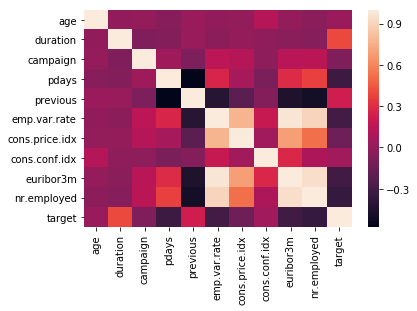

In [9]:
sns.heatmap(train.corr())

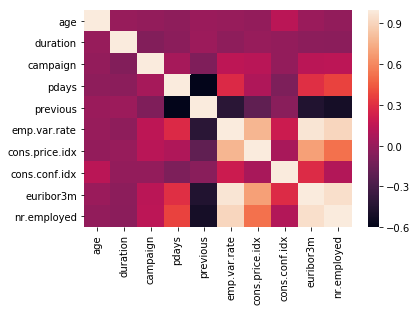

In [10]:
sns.heatmap(test.corr())

In [11]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                'contact', 'month', 'day_of_week', 'poutcome']
num_features = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 
                'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [12]:
y = train['target']

In [13]:
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train[num_features])
test_features_scaled = scaler.transform(test[num_features])

In [14]:
encoder = OneHotEncoder()
train_features_encoded = encoder.fit_transform(train[cat_features])
test_features_encoded = encoder.transform(test[cat_features])

In [15]:
X_train_sparse = csr_matrix(hstack([train_features_encoded, train_features_scaled]))
X_test_sparse = csr_matrix(hstack([test_features_encoded, test_features_scaled]))

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_sparse, y, test_size=0.3, random_state=17)

In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [18]:
%%time
knn_params = {'n_neighbors': np.arange(1, 10)}

knn = KNeighborsClassifier()
knn_grid_searcher = GridSearchCV(knn, knn_params, scoring='roc_auc', n_jobs=-1, cv=skf)
knn_grid_searcher.fit(X_train_sparse,y)

print('Лучшее значение ROC AUC для KNeighborsClassifier: {}, при параметре n_neighbors: {}'.format('%.6f' % knn_grid_searcher.best_score_, 
                                                                    '%.7f' % knn_grid_searcher.best_params_['n_neighbors']))

Лучшее значение ROC AUC для KNeighborsClassifier: 0.895914, при параметре n_neighbors: 9.0000000
Wall time: 6min 28s


In [19]:
%%time
logit_c_values = np.linspace(0.01, 50, 500)

logit_grid_searcher = LogisticRegressionCV(Cs=logit_c_values, cv=skf, random_state=17, n_jobs=-1, scoring='roc_auc', class_weight='balanced')
logit_grid_searcher.fit(X_train_sparse, y)

Wall time: 16.8 s


In [20]:
logit_mean_cv_scores = np.zeros(len(logit_c_values))
for i in logit_grid_searcher.scores_[1]: 
    logit_mean_cv_scores  += np.array(i)          
logit_mean_cv_scores = logit_mean_cv_scores / 5            

print('Лучшее значение ROC AUC для LogisticRegression: {}, при параметре C: {}'.format('%.6f' % logit_mean_cv_scores.max(), 
                                                                '%.3f' % logit_grid_searcher.Cs_[logit_mean_cv_scores.argmax()]))

Лучшее значение ROC AUC для LogisticRegression: 0.935779, при параметре C: 0.912


In [21]:
%%time
tree_params = {'criterion': ['gini', 'entropy'],
               'max_depth': range(1, 25, 1),
               'min_samples_split': range(10, 500, 10)
              }

tree_grid_searcher = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring='roc_auc', n_jobs=-1, cv=skf)
tree_grid_searcher.fit(X_train_sparse, y)

Wall time: 4min 55s


In [22]:
print('Лучшее значение ROC AUC для DecisionTreeClassifier: {}, при параметрах: {}'.format('%.6f' % tree_grid_searcher.best_score_, 
                                                                    tree_grid_searcher.best_params_))

Лучшее значение ROC AUC для DecisionTreeClassifier: 0.941040, при параметрах: {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 490}


In [23]:
logit = LogisticRegression(C=logit_grid_searcher.Cs_[logit_mean_cv_scores.argmax()], random_state=17, n_jobs=-1)
y_pred_logit = logit.fit(X_train_sparse, y).predict_proba(X_test_sparse)[:,1]

In [24]:
tree = DecisionTreeClassifier(max_depth=16, min_samples_split=490)
y_pred_tree = tree.fit(X_train_sparse, y).predict_proba(X_test_sparse)[:,1]

In [25]:
stacking = (y_pred_logit + y_pred_tree) / 2

In [26]:
# Читаем файл с примером сабмита:
submission = pd.read_csv('sample_submission.csv')
# Можно глянуть его структуру:
submission.head()
# Присваиваем колонке 'target' значения, полученные после predict_proba() твоей модельки
submission['target'] = stacking
# Формируем файл для сабмита и заливаем на странице соревнования
submission.to_csv('submission.csv', index=False)